In [1]:
import pandas as pd 

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns 

In [4]:
hauler = pd.read_csv('../data/trash_hauler_report.csv')

In [5]:
hauler.head()

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y
0,25270,11/01/17,Trash - Backdoor,"house with the wheel chair ramp, they share dr...",3817 Crouch Dr,37207.0,RED RIVER,3205,2.0,1.727970e+06,686779.478089
1,25274,11/01/17,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218.0,RED RIVER,4202,1.0,1.721259e+06,685444.799565
2,25276,11/01/17,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209.0,RED RIVER,4205,20.0,1.707027e+06,659887.471571
3,25307,11/01/17,Trash - Curbside/Alley Missed Pickup,missed,2603 old matthews rd,37207.0,WASTE IND,2206,2.0,1.735692e+06,685027.245923
4,25312,11/01/17,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 croley dr,37209.0,RED RIVER,4203,20.0,1.710186e+06,664205.101066


In [6]:
hauler.shape

(20226, 11)

In [7]:
hauler.tail()

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y
20221,267125,11/01/19,Trash - Curbside/Alley Missed Pickup,MISSED...NEIGHBORS MISSED,2731 Murfreesboro Pike,37013.0,RED RIVER,4502,32.0,1.781137e+06,632448.551144
20222,267126,11/01/19,Trash - Curbside/Alley Missed Pickup,entire alley,"1621 Long Ave, Nashville, TN 37206, United States",37206.0,METRO,9508,6.0,1.749711e+06,669201.601569
20223,267130,11/01/19,Trash - Curbside/Alley Missed Pickup,missed several,"2943 Windemere Cir, Nashville, TN 37214, Unite...",37214.0,RED RIVER,1502,15.0,1.770293e+06,674936.303809
20224,267134,11/01/19,Trash - Curbside/Alley Missed Pickup,Caller stated trash was missed & were only pic...,"3325 Murfreesboro Pike, Nashville, TN 37013, U...",37013.0,RED RIVER,4502,32.0,1.785225e+06,627146.400187
20225,267137,11/01/19,Trash - Curbside/Alley Missed Pickup,possibly others missed as well,"604 Somerset Ct, Nashville, TN 37217, United S...",37217.0,RED RIVER,2505,29.0,1.781360e+06,637742.006846


In [8]:
zip_counts = hauler['Zip Code'].value_counts()
print(zip_counts)

Zip Code
37013.0    2278
37211.0    2248
37205.0    1491
37209.0    1411
37215.0    1404
37207.0    1300
37115.0    1266
37206.0    1217
37208.0    1039
37214.0    1004
37218.0     983
37216.0     841
37217.0     832
37204.0     635
37212.0     601
37210.0     550
37203.0     394
37220.0     289
37027.0     168
37189.0      60
37221.0      48
37219.0      42
37201.0      35
37076.0       5
37138.0       5
37086.0       3
37213.0       1
37228.0       1
Name: count, dtype: int64


In [9]:
hauler.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20226 entries, 0 to 20225
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Request Number    20226 non-null  int64  
 1   Date Opened       20226 non-null  object 
 2   Request           20226 non-null  object 
 3   Description       20195 non-null  object 
 4   Incident Address  20217 non-null  object 
 5   Zip Code          20151 non-null  float64
 6   Trash Hauler      19325 non-null  object 
 7   Trash Route       19279 non-null  object 
 8   Council District  20177 non-null  float64
 9   State Plan X      20198 non-null  float64
 10  State Plan Y      20198 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 1.7+ MB


In [10]:
hauler[ 'Request '] = hauler[ 'Request '].astype('string')

In [11]:
hauler.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20226 entries, 0 to 20225
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Request Number    20226 non-null  int64  
 1   Date Opened       20226 non-null  object 
 2   Request           20226 non-null  string 
 3   Description       20195 non-null  object 
 4   Incident Address  20217 non-null  object 
 5   Zip Code          20151 non-null  float64
 6   Trash Hauler      19325 non-null  object 
 7   Trash Route       19279 non-null  object 
 8   Council District  20177 non-null  float64
 9   State Plan X      20198 non-null  float64
 10  State Plan Y      20198 non-null  float64
dtypes: float64(4), int64(1), object(5), string(1)
memory usage: 1.7+ MB


In [12]:
#hauler_filtered = hauler.loc[hauler['Trash Hauler'].str.contains('RED RIVER') == True]
#hauler_filtered

In [13]:
hauler['Description'] = hauler['Description'].fillna("").str.lower().astype('string')
hauler.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20226 entries, 0 to 20225
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Request Number    20226 non-null  int64  
 1   Date Opened       20226 non-null  object 
 2   Request           20226 non-null  string 
 3   Description       20226 non-null  string 
 4   Incident Address  20217 non-null  object 
 5   Zip Code          20151 non-null  float64
 6   Trash Hauler      19325 non-null  object 
 7   Trash Route       19279 non-null  object 
 8   Council District  20177 non-null  float64
 9   State Plan X      20198 non-null  float64
 10  State Plan Y      20198 non-null  float64
dtypes: float64(4), int64(1), object(4), string(2)
memory usage: 1.7+ MB


In [14]:
#missed_and_hauler = hauler_filtered.loc[hauler_filtered['Request '].str.contains('Missed') == True]
#missed_and_hauler

In [15]:
#missed_pickups = hauler[hauler['Request '].str.contains('Missed') & hauler['Description'].str.contains('(?i)missed')]
#missed_pickups

In [16]:
missed_pickups = hauler.loc[hauler['Request '].str.contains('(?i)Missed') | hauler['Description'].str.contains('(?i)miss')]
missed_pickups

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y
1,25274,11/01/17,Trash - Curbside/Alley Missed Pickup,curb/trash miss tuesday.,4028 Clarksville Pike,37218.0,RED RIVER,4202,1.0,1.721259e+06,685444.799565
2,25276,11/01/17,Trash - Curbside/Alley Missed Pickup,curb/trash miss tuesday.,6528 Thunderbird Dr,37209.0,RED RIVER,4205,20.0,1.707027e+06,659887.471571
3,25307,11/01/17,Trash - Curbside/Alley Missed Pickup,missed,2603 old matthews rd,37207.0,WASTE IND,2206,2.0,1.735692e+06,685027.245923
4,25312,11/01/17,Trash - Curbside/Alley Missed Pickup,missed the even side of the road.,604 croley dr,37209.0,RED RIVER,4203,20.0,1.710186e+06,664205.101066
7,25327,11/01/17,Trash Collection Complaint,"trash out on time, miss again tuesday. alley",1816 Jo Johnston Ave,37203.0,METRO,9208,21.0,1.731459e+06,666013.601229
...,...,...,...,...,...,...,...,...,...,...,...
20221,267125,11/01/19,Trash - Curbside/Alley Missed Pickup,missed...neighbors missed,2731 Murfreesboro Pike,37013.0,RED RIVER,4502,32.0,1.781137e+06,632448.551144
20222,267126,11/01/19,Trash - Curbside/Alley Missed Pickup,entire alley,"1621 Long Ave, Nashville, TN 37206, United States",37206.0,METRO,9508,6.0,1.749711e+06,669201.601569
20223,267130,11/01/19,Trash - Curbside/Alley Missed Pickup,missed several,"2943 Windemere Cir, Nashville, TN 37214, Unite...",37214.0,RED RIVER,1502,15.0,1.770293e+06,674936.303809
20224,267134,11/01/19,Trash - Curbside/Alley Missed Pickup,caller stated trash was missed & were only pic...,"3325 Murfreesboro Pike, Nashville, TN 37013, U...",37013.0,RED RIVER,4502,32.0,1.785225e+06,627146.400187


In [17]:
#bellshauler = hauler.loc[
#    (hauler['Description'].str.contains('miss') == True) |
#    (hauler['Request '].str.contains('Missed') == True)]
#bellshauler

In [18]:
redmiss =  missed_pickups.loc[missed_pickups['Trash Hauler'].str.contains('RED RIVER') == True]
redmiss

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y
1,25274,11/01/17,Trash - Curbside/Alley Missed Pickup,curb/trash miss tuesday.,4028 Clarksville Pike,37218.0,RED RIVER,4202,1.0,1.721259e+06,685444.799565
2,25276,11/01/17,Trash - Curbside/Alley Missed Pickup,curb/trash miss tuesday.,6528 Thunderbird Dr,37209.0,RED RIVER,4205,20.0,1.707027e+06,659887.471571
4,25312,11/01/17,Trash - Curbside/Alley Missed Pickup,missed the even side of the road.,604 croley dr,37209.0,RED RIVER,4203,20.0,1.710186e+06,664205.101066
8,25330,11/01/17,Trash - Curbside/Alley Missed Pickup,missed.,4484 Lavergne Couchville Pike,37013.0,RED RIVER,4210,33.0,1.794534e+06,618749.342732
10,25341,11/01/17,Trash - Curbside/Alley Missed Pickup,missed trash pickup - resident has at curb for...,3113 HYDES FERRY RD,37218.0,RED RIVER,4204,2.0,1.721578e+06,676018.399900
...,...,...,...,...,...,...,...,...,...,...,...
20220,267121,11/01/19,Trash - Curbside/Alley Missed Pickup,missed,"2709 Crestdale Dr, Nashville, TN 37214, United...",37214.0,RED RIVER,1502,15.0,1.770240e+06,676334.399319
20221,267125,11/01/19,Trash - Curbside/Alley Missed Pickup,missed...neighbors missed,2731 Murfreesboro Pike,37013.0,RED RIVER,4502,32.0,1.781137e+06,632448.551144
20223,267130,11/01/19,Trash - Curbside/Alley Missed Pickup,missed several,"2943 Windemere Cir, Nashville, TN 37214, Unite...",37214.0,RED RIVER,1502,15.0,1.770293e+06,674936.303809
20224,267134,11/01/19,Trash - Curbside/Alley Missed Pickup,caller stated trash was missed & were only pic...,"3325 Murfreesboro Pike, Nashville, TN 37013, U...",37013.0,RED RIVER,4502,32.0,1.785225e+06,627146.400187


In [19]:
#redmiss = redmiss.dropna(subset=['Incident Address'])
#redmiss

In [20]:
redmiss.loc[:, 'Incident Address'] = redmiss['Incident Address'].str.split(',').str[0]
redmiss

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y
1,25274,11/01/17,Trash - Curbside/Alley Missed Pickup,curb/trash miss tuesday.,4028 Clarksville Pike,37218.0,RED RIVER,4202,1.0,1.721259e+06,685444.799565
2,25276,11/01/17,Trash - Curbside/Alley Missed Pickup,curb/trash miss tuesday.,6528 Thunderbird Dr,37209.0,RED RIVER,4205,20.0,1.707027e+06,659887.471571
4,25312,11/01/17,Trash - Curbside/Alley Missed Pickup,missed the even side of the road.,604 croley dr,37209.0,RED RIVER,4203,20.0,1.710186e+06,664205.101066
8,25330,11/01/17,Trash - Curbside/Alley Missed Pickup,missed.,4484 Lavergne Couchville Pike,37013.0,RED RIVER,4210,33.0,1.794534e+06,618749.342732
10,25341,11/01/17,Trash - Curbside/Alley Missed Pickup,missed trash pickup - resident has at curb for...,3113 HYDES FERRY RD,37218.0,RED RIVER,4204,2.0,1.721578e+06,676018.399900
...,...,...,...,...,...,...,...,...,...,...,...
20220,267121,11/01/19,Trash - Curbside/Alley Missed Pickup,missed,2709 Crestdale Dr,37214.0,RED RIVER,1502,15.0,1.770240e+06,676334.399319
20221,267125,11/01/19,Trash - Curbside/Alley Missed Pickup,missed...neighbors missed,2731 Murfreesboro Pike,37013.0,RED RIVER,4502,32.0,1.781137e+06,632448.551144
20223,267130,11/01/19,Trash - Curbside/Alley Missed Pickup,missed several,2943 Windemere Cir,37214.0,RED RIVER,1502,15.0,1.770293e+06,674936.303809
20224,267134,11/01/19,Trash - Curbside/Alley Missed Pickup,caller stated trash was missed & were only pic...,3325 Murfreesboro Pike,37013.0,RED RIVER,4502,32.0,1.785225e+06,627146.400187


In [21]:
redmiss['Incident Address'].info()

<class 'pandas.core.series.Series'>
Index: 12841 entries, 1 to 20225
Series name: Incident Address
Non-Null Count  Dtype 
--------------  ----- 
12840 non-null  object
dtypes: object(1)
memory usage: 200.6+ KB


In [22]:
redmiss.loc[:, 'Incident Address'] = redmiss['Incident Address'].astype('string')
redmiss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12841 entries, 1 to 20225
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Request Number    12841 non-null  int64  
 1   Date Opened       12841 non-null  object 
 2   Request           12841 non-null  string 
 3   Description       12841 non-null  string 
 4   Incident Address  12840 non-null  object 
 5   Zip Code          12813 non-null  float64
 6   Trash Hauler      12841 non-null  object 
 7   Trash Route       12839 non-null  object 
 8   Council District  12828 non-null  float64
 9   State Plan X      12836 non-null  float64
 10  State Plan Y      12836 non-null  float64
dtypes: float64(4), int64(1), object(4), string(2)
memory usage: 1.2+ MB


In [23]:
redmiss.loc[:, 'Incident Address'] = redmiss['Incident Address'].astype('string').str.lower()

In [24]:
redmiss.loc[:, 'Incident Address'] = redmiss['Incident Address'].str.replace("United States", "")
redmiss.loc[:, 'Incident Address'] = redmiss['Incident Address'].str.replace("Tennessee", "Tn")
redmiss.loc[:, 'Incident Address'] = redmiss['Incident Address'].str.replace("Tn", "")

In [25]:
redmiss

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y
1,25274,11/01/17,Trash - Curbside/Alley Missed Pickup,curb/trash miss tuesday.,4028 clarksville pike,37218.0,RED RIVER,4202,1.0,1.721259e+06,685444.799565
2,25276,11/01/17,Trash - Curbside/Alley Missed Pickup,curb/trash miss tuesday.,6528 thunderbird dr,37209.0,RED RIVER,4205,20.0,1.707027e+06,659887.471571
4,25312,11/01/17,Trash - Curbside/Alley Missed Pickup,missed the even side of the road.,604 croley dr,37209.0,RED RIVER,4203,20.0,1.710186e+06,664205.101066
8,25330,11/01/17,Trash - Curbside/Alley Missed Pickup,missed.,4484 lavergne couchville pike,37013.0,RED RIVER,4210,33.0,1.794534e+06,618749.342732
10,25341,11/01/17,Trash - Curbside/Alley Missed Pickup,missed trash pickup - resident has at curb for...,3113 hydes ferry rd,37218.0,RED RIVER,4204,2.0,1.721578e+06,676018.399900
...,...,...,...,...,...,...,...,...,...,...,...
20220,267121,11/01/19,Trash - Curbside/Alley Missed Pickup,missed,2709 crestdale dr,37214.0,RED RIVER,1502,15.0,1.770240e+06,676334.399319
20221,267125,11/01/19,Trash - Curbside/Alley Missed Pickup,missed...neighbors missed,2731 murfreesboro pike,37013.0,RED RIVER,4502,32.0,1.781137e+06,632448.551144
20223,267130,11/01/19,Trash - Curbside/Alley Missed Pickup,missed several,2943 windemere cir,37214.0,RED RIVER,1502,15.0,1.770293e+06,674936.303809
20224,267134,11/01/19,Trash - Curbside/Alley Missed Pickup,caller stated trash was missed & were only pic...,3325 murfreesboro pike,37013.0,RED RIVER,4502,32.0,1.785225e+06,627146.400187


In [26]:
redmiss.shape

(12841, 11)

In [27]:
redmiss['Incident Address'] = redmiss['Incident Address'].str.upper()

C:\Users\user\AppData\Local\Temp\ipykernel_20792\174807461.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  redmiss['Incident Address'] = redmiss['Incident Address'].str.upper()


In [28]:
redproblemhouses = redmiss['Incident Address'].nunique()

In [29]:
redproblemhouses

8243

In [30]:
rednon1missed = redmiss.shape[0] - redproblemhouses
rednon1missed

4598

In [31]:
redtotalfines = rednon1missed * 200
print(f"The total amount of damages due to missed pickups by Red River is ${redtotalfines}")

The total amount of damages due to missed pickups by Red River is $919600


In [32]:
metromiss =  missed_pickups.loc[missed_pickups['Trash Hauler'].str.contains('METRO') == True]
metromiss

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y
7,25327,11/01/17,Trash Collection Complaint,"trash out on time, miss again tuesday. alley",1816 Jo Johnston Ave,37203.0,METRO,9208,21.0,1.731459e+06,666013.601229
9,25331,11/01/17,Trash - Curbside/Alley Missed Pickup,"trash missed tuesday again, alley",1206 Ireland St,37208.0,METRO,9208,19.0,1.733029e+06,668762.640891
12,25359,11/01/17,Trash - Curbside/Alley Missed Pickup,missed. does not have access to alley.,830 Meridian St,37207.0,METRO,9207,5.0,1.741745e+06,675328.666057
22,25471,11/01/17,Trash - Curbside/Alley Missed Pickup,"alley trash miss tuesday, also others as well,...",1904 MeHarry Blvd,37208.0,METRO,9208,21.0,1.730048e+06,668927.190485
39,25539,11/02/17,Trash - Curbside/Alley Missed Pickup,alley trash miss for wednesday. wants cart emp...,2524 Batavia St,37208.0,METRO,9303,21.0,1.727574e+06,666486.401815
...,...,...,...,...,...,...,...,...,...,...,...
20212,267023,11/01/19,Trash - Curbside/Alley Missed Pickup,trash/missed thursday {carts sit's on the arch...,"1098 12th Ave S, Nashville, TN 37203, United S...",37203.0,METRO,9407,17.0,1.736441e+06,660570.319973
20213,267035,11/01/19,Trash - Curbside/Alley Missed Pickup,"constantly missed, please pick up","1400 Dickerson Pike, Nashville, TN 37207, Unit...",37207.0,METRO,9204,5.0,1.740796e+06,679412.798844
20216,267089,11/01/19,Trash - Curbside/Alley Missed Pickup,the entire street/missed/curb thursday,"1008 Waverly Ave, Nashville, TN 37203, United ...",37203.0,METRO,9407,17.0,1.736525e+06,657016.001416
20219,267119,11/01/19,Trash - Curbside/Alley Missed Pickup,church missed as wel,"1701 Long Ave, Nashville, TN 37206, United States",37206.0,METRO,9508,6.0,1.750025e+06,669155.312480


In [33]:
metromiss.loc[:, 'Incident Address'] = metromiss['Incident Address'].str.split(',').str[0]
metromiss

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y
7,25327,11/01/17,Trash Collection Complaint,"trash out on time, miss again tuesday. alley",1816 Jo Johnston Ave,37203.0,METRO,9208,21.0,1.731459e+06,666013.601229
9,25331,11/01/17,Trash - Curbside/Alley Missed Pickup,"trash missed tuesday again, alley",1206 Ireland St,37208.0,METRO,9208,19.0,1.733029e+06,668762.640891
12,25359,11/01/17,Trash - Curbside/Alley Missed Pickup,missed. does not have access to alley.,830 Meridian St,37207.0,METRO,9207,5.0,1.741745e+06,675328.666057
22,25471,11/01/17,Trash - Curbside/Alley Missed Pickup,"alley trash miss tuesday, also others as well,...",1904 MeHarry Blvd,37208.0,METRO,9208,21.0,1.730048e+06,668927.190485
39,25539,11/02/17,Trash - Curbside/Alley Missed Pickup,alley trash miss for wednesday. wants cart emp...,2524 Batavia St,37208.0,METRO,9303,21.0,1.727574e+06,666486.401815
...,...,...,...,...,...,...,...,...,...,...,...
20212,267023,11/01/19,Trash - Curbside/Alley Missed Pickup,trash/missed thursday {carts sit's on the arch...,1098 12th Ave S,37203.0,METRO,9407,17.0,1.736441e+06,660570.319973
20213,267035,11/01/19,Trash - Curbside/Alley Missed Pickup,"constantly missed, please pick up",1400 Dickerson Pike,37207.0,METRO,9204,5.0,1.740796e+06,679412.798844
20216,267089,11/01/19,Trash - Curbside/Alley Missed Pickup,the entire street/missed/curb thursday,1008 Waverly Ave,37203.0,METRO,9407,17.0,1.736525e+06,657016.001416
20219,267119,11/01/19,Trash - Curbside/Alley Missed Pickup,church missed as wel,1701 Long Ave,37206.0,METRO,9508,6.0,1.750025e+06,669155.312480


In [34]:
metromiss['Incident Address'].info()

<class 'pandas.core.series.Series'>
Index: 2978 entries, 7 to 20222
Series name: Incident Address
Non-Null Count  Dtype 
--------------  ----- 
2977 non-null   object
dtypes: object(1)
memory usage: 46.5+ KB


In [35]:
metromiss.loc[:, 'Incident Address'] = metromiss['Incident Address'].astype('string')
metromiss['Incident Address'].info()

<class 'pandas.core.series.Series'>
Index: 2978 entries, 7 to 20222
Series name: Incident Address
Non-Null Count  Dtype 
--------------  ----- 
2977 non-null   object
dtypes: object(1)
memory usage: 46.5+ KB


In [36]:
metromiss.loc[:, 'Incident Address'] = metromiss['Incident Address'].astype('string').str.lower()

In [37]:
metromiss.loc[:, 'Incident Address'] = metromiss['Incident Address'].str.replace("United States", "")
metromiss.loc[:, 'Incident Address'] = metromiss['Incident Address'].str.replace("Tennessee", "Tn")
metromiss.loc[:, 'Incident Address'] = metromiss['Incident Address'].str.replace("Tn", "")

In [38]:
metromiss['Incident Address'] = metromiss['Incident Address'].str.upper()

C:\Users\user\AppData\Local\Temp\ipykernel_20792\1078073622.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metromiss['Incident Address'] = metromiss['Incident Address'].str.upper()


In [39]:
metroproblemhouses = metromiss['Incident Address'].nunique()

In [40]:
metronon1missed = metromiss.shape[0] - metroproblemhouses
metronon1missed

1062

In [41]:
metrototalfines = metronon1missed * 200
print(f"The total amount of damages due to missed pickups by Metro is ${metrototalfines}")

The total amount of damages due to missed pickups by Metro is $212400


In [42]:
#compare metrototalfines to redtotalfines

In [43]:
metromiss['Date Opened'] = pd.to_datetime(metromiss['Date Opened'])

C:\Users\user\AppData\Local\Temp\ipykernel_20792\2341449664.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  metromiss['Date Opened'] = pd.to_datetime(metromiss['Date Opened'])
C:\Users\user\AppData\Local\Temp\ipykernel_20792\2341449664.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metromiss['Date Opened'] = pd.to_datetime(metromiss['Date Opened'])


In [44]:
metromiss['Date Opened'].info()

<class 'pandas.core.series.Series'>
Index: 2978 entries, 7 to 20222
Series name: Date Opened
Non-Null Count  Dtype         
--------------  -----         
2978 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 46.5 KB


In [45]:
metromiss = metromiss.sort_values(by='Date Opened')

<Axes: xlabel='Date Opened'>

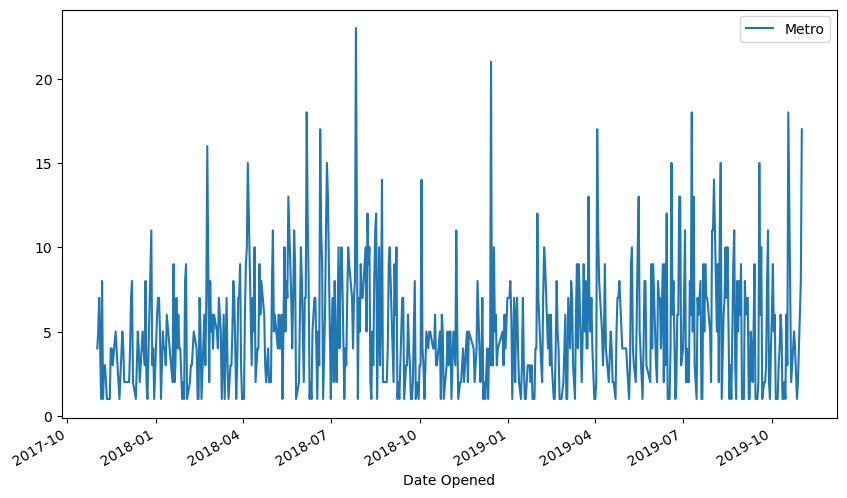

In [46]:
metromiss_year = metromiss['Date Opened'].value_counts().to_frame().reset_index()
metromiss_year.sort_values('Date Opened').plot(x='Date Opened',y='count', label='Metro', figsize = (10,6))

In [47]:
redmiss['Date Opened'] = pd.to_datetime(redmiss['Date Opened'])

C:\Users\user\AppData\Local\Temp\ipykernel_20792\3994026129.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  redmiss['Date Opened'] = pd.to_datetime(redmiss['Date Opened'])
C:\Users\user\AppData\Local\Temp\ipykernel_20792\3994026129.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  redmiss['Date Opened'] = pd.to_datetime(redmiss['Date Opened'])


<Axes: xlabel='Date Opened'>

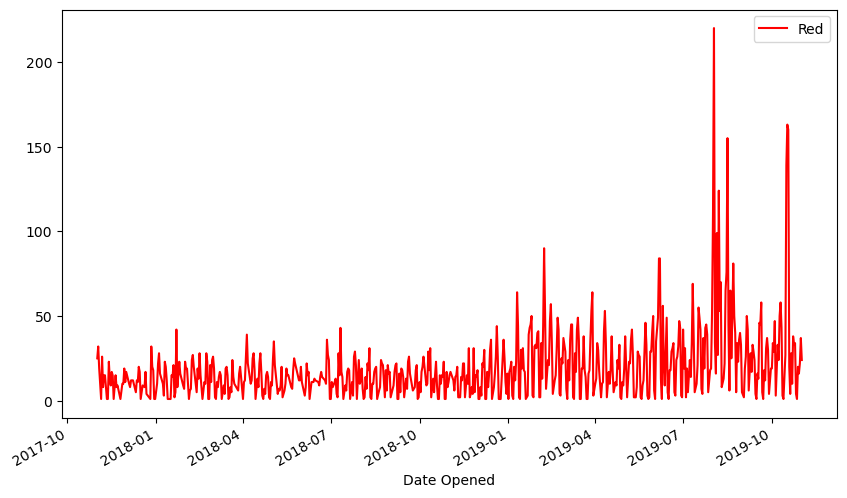

In [48]:
redmiss_year = redmiss['Date Opened'].value_counts().to_frame().reset_index()
redmiss_year.sort_values('Date Opened').plot(x='Date Opened',y='count', color = 'red', label = 'Red', figsize = (10,6))

In [49]:
wasteind =  missed_pickups.loc[missed_pickups['Trash Hauler'].str.contains('WASTE IND') == True]
wasteind

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y
3,25307,11/01/17,Trash - Curbside/Alley Missed Pickup,missed,2603 old matthews rd,37207.0,WASTE IND,2206,2.0,1.735692e+06,685027.245923
94,25972,11/03/17,Trash - Curbside/Alley Missed Pickup,missed.,916 Petway Ave,37206.0,WASTE IND,2509,5.0,1.746483e+06,675576.311639
192,27229,11/09/17,Trash - Curbside/Alley Missed Pickup,trash missed past 2 weeks,415 35th ave N,37209.0,WASTE IND,3306,21.0,1.724396e+06,663795.769164
194,27242,11/09/17,Trash - Curbside/Alley Missed Pickup,cust says missed pickup,918 W GREENWOOD AVE,37206.0,WASTE IND,2509,5.0,1.746589e+06,676985.599246
210,27511,11/13/17,Trash - Curbside/Alley Missed Pickup,missed pick up - unit c,27 hart st C,37210.0,WASTE IND,4409,17.0,1.744013e+06,659286.402245
...,...,...,...,...,...,...,...,...,...,...,...
20096,265871,10/30/19,Trash Collection Complaint,today makes 3 weeks missed trash/curb {sit's o...,"4001 Nebraska Ave, Nashville, TN 37209, United...",37209.0,WASTE IND,2308,24.0,1.722556e+06,659684.000570
20115,266137,10/30/19,Trash Collection Complaint,"2 weeks missed wednesday, sit's on nevada ave ...","301 33rd Ave N, Nashville, TN 37209, United St...",37209.0,WASTE IND,2308,24.0,1.725182e+06,662212.800027
20137,266298,10/31/19,Trash - Curbside/Alley Missed Pickup,missed trash pick up.,"403 Merritt Ave, Nashville, TN 37203, USA",37203.0,WASTE IND,2408,17.0,1.742765e+06,658152.089866
20180,266711,11/01/19,Trash - Curbside/Alley Missed Pickup,missed trash pick up here/ got neighbors just ...,"907 N 14th St, Nashville, TN 37206, United States",37206.0,WASTE IND,2509,6.0,1.748838e+06,675118.401004


In [50]:
wasteind.loc[:, 'Incident Address'] = wasteind['Incident Address'].str.split(',').str[0]
wasteind

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y
3,25307,11/01/17,Trash - Curbside/Alley Missed Pickup,missed,2603 old matthews rd,37207.0,WASTE IND,2206,2.0,1.735692e+06,685027.245923
94,25972,11/03/17,Trash - Curbside/Alley Missed Pickup,missed.,916 Petway Ave,37206.0,WASTE IND,2509,5.0,1.746483e+06,675576.311639
192,27229,11/09/17,Trash - Curbside/Alley Missed Pickup,trash missed past 2 weeks,415 35th ave N,37209.0,WASTE IND,3306,21.0,1.724396e+06,663795.769164
194,27242,11/09/17,Trash - Curbside/Alley Missed Pickup,cust says missed pickup,918 W GREENWOOD AVE,37206.0,WASTE IND,2509,5.0,1.746589e+06,676985.599246
210,27511,11/13/17,Trash - Curbside/Alley Missed Pickup,missed pick up - unit c,27 hart st C,37210.0,WASTE IND,4409,17.0,1.744013e+06,659286.402245
...,...,...,...,...,...,...,...,...,...,...,...
20096,265871,10/30/19,Trash Collection Complaint,today makes 3 weeks missed trash/curb {sit's o...,4001 Nebraska Ave,37209.0,WASTE IND,2308,24.0,1.722556e+06,659684.000570
20115,266137,10/30/19,Trash Collection Complaint,"2 weeks missed wednesday, sit's on nevada ave ...",301 33rd Ave N,37209.0,WASTE IND,2308,24.0,1.725182e+06,662212.800027
20137,266298,10/31/19,Trash - Curbside/Alley Missed Pickup,missed trash pick up.,403 Merritt Ave,37203.0,WASTE IND,2408,17.0,1.742765e+06,658152.089866
20180,266711,11/01/19,Trash - Curbside/Alley Missed Pickup,missed trash pick up here/ got neighbors just ...,907 N 14th St,37206.0,WASTE IND,2509,6.0,1.748838e+06,675118.401004


In [51]:
wasteind['Incident Address'].info()

<class 'pandas.core.series.Series'>
Index: 1128 entries, 3 to 20184
Series name: Incident Address
Non-Null Count  Dtype 
--------------  ----- 
1128 non-null   object
dtypes: object(1)
memory usage: 17.6+ KB


In [52]:
wasteind.loc[:, 'Incident Address'] = wasteind['Incident Address'].astype('string')
wasteind.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1128 entries, 3 to 20184
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Request Number    1128 non-null   int64  
 1   Date Opened       1128 non-null   object 
 2   Request           1128 non-null   string 
 3   Description       1128 non-null   string 
 4   Incident Address  1128 non-null   object 
 5   Zip Code          1124 non-null   float64
 6   Trash Hauler      1128 non-null   object 
 7   Trash Route       1128 non-null   object 
 8   Council District  1125 non-null   float64
 9   State Plan X      1127 non-null   float64
 10  State Plan Y      1127 non-null   float64
dtypes: float64(4), int64(1), object(4), string(2)
memory usage: 105.8+ KB


In [53]:
wasteind.loc[:, 'Incident Address'] = wasteind['Incident Address'].astype('string').str.lower()

In [54]:
wasteind.loc[:, 'Incident Address'] = wasteind['Incident Address'].str.replace("United States", "")
wasteind.loc[:, 'Incident Address'] = wasteind['Incident Address'].str.replace("Tennessee", "Tn")
wasteind.loc[:, 'Incident Address'] = wasteind['Incident Address'].str.replace("Tn", "")
wasteind

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y
3,25307,11/01/17,Trash - Curbside/Alley Missed Pickup,missed,2603 old matthews rd,37207.0,WASTE IND,2206,2.0,1.735692e+06,685027.245923
94,25972,11/03/17,Trash - Curbside/Alley Missed Pickup,missed.,916 petway ave,37206.0,WASTE IND,2509,5.0,1.746483e+06,675576.311639
192,27229,11/09/17,Trash - Curbside/Alley Missed Pickup,trash missed past 2 weeks,415 35th ave n,37209.0,WASTE IND,3306,21.0,1.724396e+06,663795.769164
194,27242,11/09/17,Trash - Curbside/Alley Missed Pickup,cust says missed pickup,918 w greenwood ave,37206.0,WASTE IND,2509,5.0,1.746589e+06,676985.599246
210,27511,11/13/17,Trash - Curbside/Alley Missed Pickup,missed pick up - unit c,27 hart st c,37210.0,WASTE IND,4409,17.0,1.744013e+06,659286.402245
...,...,...,...,...,...,...,...,...,...,...,...
20096,265871,10/30/19,Trash Collection Complaint,today makes 3 weeks missed trash/curb {sit's o...,4001 nebraska ave,37209.0,WASTE IND,2308,24.0,1.722556e+06,659684.000570
20115,266137,10/30/19,Trash Collection Complaint,"2 weeks missed wednesday, sit's on nevada ave ...",301 33rd ave n,37209.0,WASTE IND,2308,24.0,1.725182e+06,662212.800027
20137,266298,10/31/19,Trash - Curbside/Alley Missed Pickup,missed trash pick up.,403 merritt ave,37203.0,WASTE IND,2408,17.0,1.742765e+06,658152.089866
20180,266711,11/01/19,Trash - Curbside/Alley Missed Pickup,missed trash pick up here/ got neighbors just ...,907 n 14th st,37206.0,WASTE IND,2509,6.0,1.748838e+06,675118.401004


In [55]:
wasteind['Incident Address'] = wasteind['Incident Address'].str.upper()

C:\Users\user\AppData\Local\Temp\ipykernel_20792\429199042.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wasteind['Incident Address'] = wasteind['Incident Address'].str.upper()


In [56]:
wasteindproblemhouses = wasteind['Incident Address'].nunique()
wasteindproblemhouses

747

In [57]:
wasteindnon1missed = wasteind.shape[0] - wasteindproblemhouses
wasteindnon1missed

381

In [58]:
wasteindtotalfines = wasteindnon1missed * 200
print(f"The total amount of damages due to missed pickups by Waste IND is ${wasteindtotalfines}")

The total amount of damages due to missed pickups by Waste IND is $76200


In [59]:
wasteind['Date Opened'] = pd.to_datetime(wasteind['Date Opened'])

C:\Users\user\AppData\Local\Temp\ipykernel_20792\3998708736.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  wasteind['Date Opened'] = pd.to_datetime(wasteind['Date Opened'])
C:\Users\user\AppData\Local\Temp\ipykernel_20792\3998708736.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wasteind['Date Opened'] = pd.to_datetime(wasteind['Date Opened'])


In [60]:
wasteind['Date Opened'].info()

<class 'pandas.core.series.Series'>
Index: 1128 entries, 3 to 20184
Series name: Date Opened
Non-Null Count  Dtype         
--------------  -----         
1128 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 17.6 KB


In [61]:
wasteind = wasteind.sort_values(by='Date Opened')

<Axes: xlabel='Date Opened'>

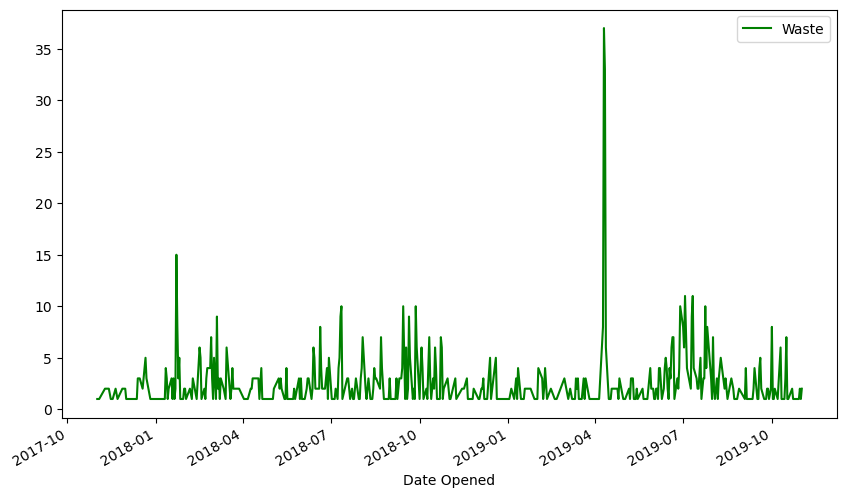

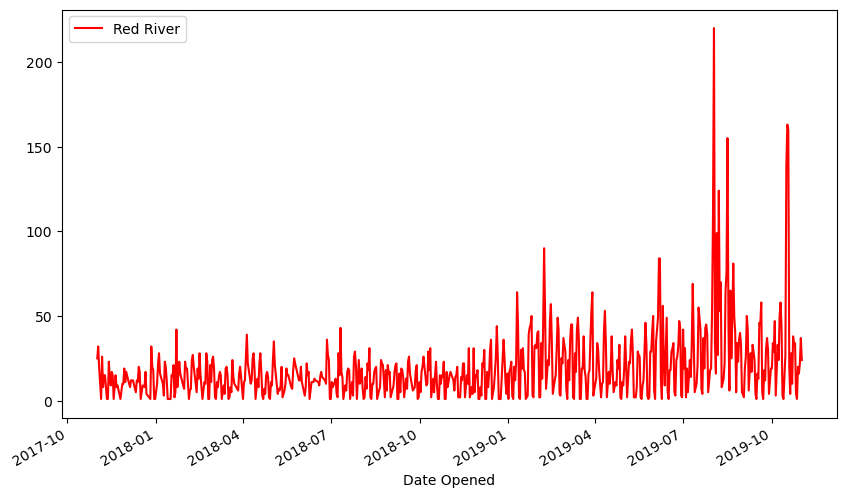

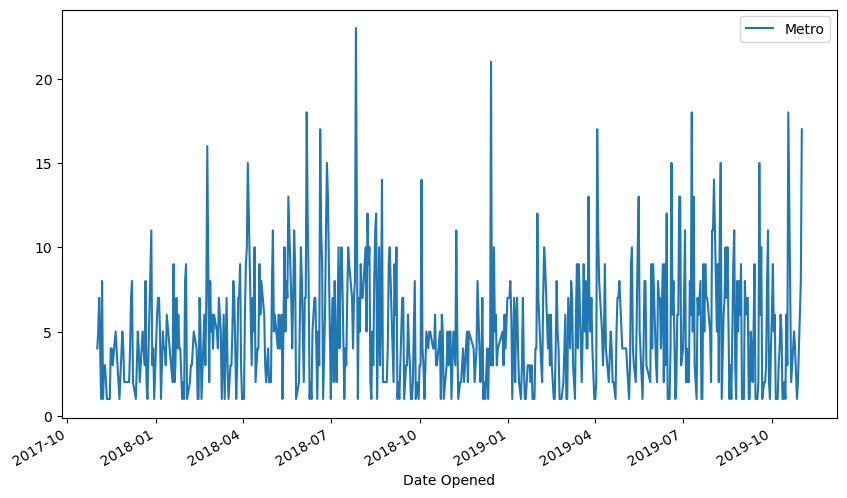

In [62]:
wasteind_year = wasteind['Date Opened'].value_counts().to_frame().reset_index()
wasteind_year.sort_values('Date Opened').plot(x='Date Opened',y='count', color = 'green', label='Waste', figsize = (10,6))
redmiss_year.sort_values('Date Opened').plot(x='Date Opened',y='count', color='red', label='Red River', figsize = (10,6))
metromiss_year.sort_values('Date Opened').plot(x='Date Opened',y='count', label='Metro', figsize = (10,6))

<Axes: xlabel='Date Opened', ylabel='Count'>

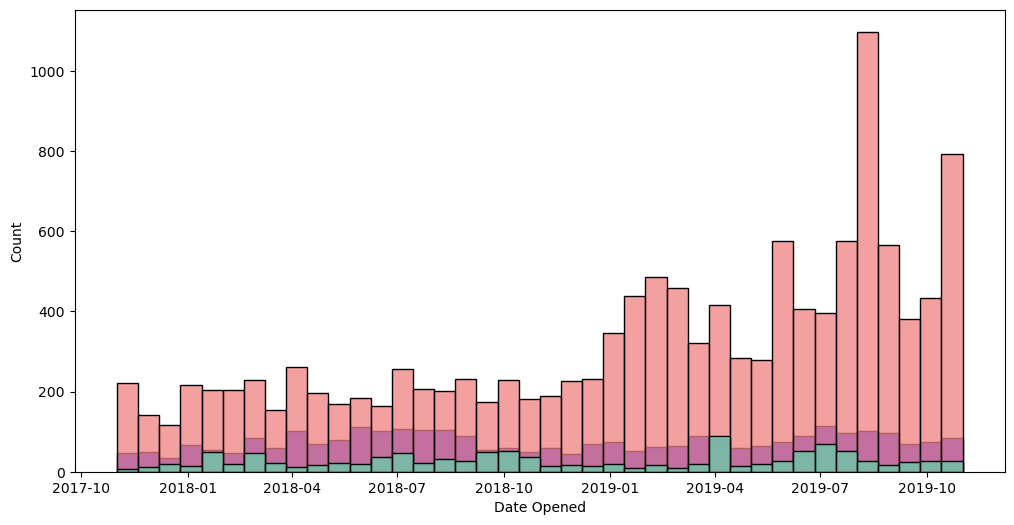

In [144]:
plt.figure(figsize=(12, 6))
sns.histplot(metromiss['Date Opened'], color='blue', label='Metro', bins=40, stat='count')
sns.histplot(redmiss['Date Opened'], color='lightcoral', label='Red', bins=40, stat='count')
sns.histplot(wasteind['Date Opened'], color='mediumaquamarine', label='Waste', bins=40, stat='count')

<Axes: xlabel='Date Opened', ylabel='Density'>

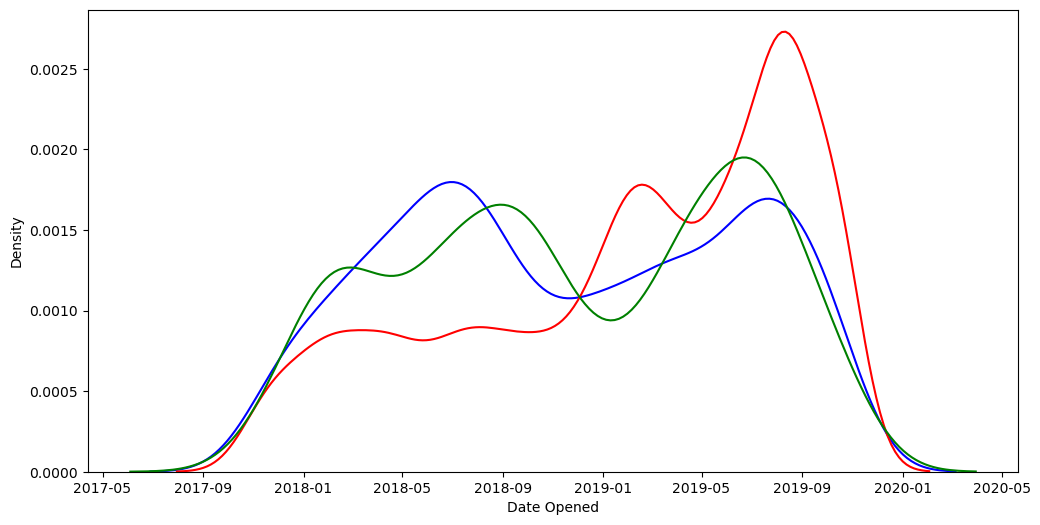

In [64]:
plt.figure(figsize=(12, 6))
sns.kdeplot(x='Date Opened', data= metromiss, color='blue', label='Metro')
sns.kdeplot(x='Date Opened', data= redmiss, color='red', label='Red')
sns.kdeplot(x='Date Opened', data= wasteind, color='green', label='Waste')

In [65]:
#The total amount of damages due to missed pickups by Metro is $212400
#The total amount of damages due to missed pickups by Red River is $919600
#The total amount of damages due to missed pickups by Waste IND is $76200

<Axes: xlabel='Date Opened', ylabel='Zip Code'>

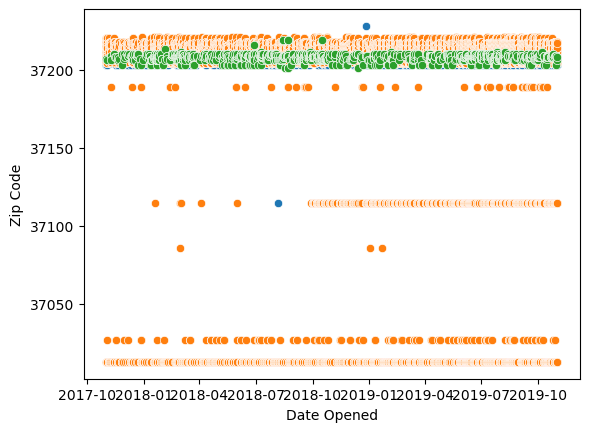

In [142]:
sns.scatterplot(x=metromiss['Date Opened'],y=metromiss['Zip Code'])
sns.scatterplot(x=redmiss['Date Opened'],y=redmiss['Zip Code'])
sns.scatterplot(x=wasteind['Date Opened'],y=wasteind['Zip Code'])

In [7]:
wasteindproblemhouses.describe()

NameError: name 'wasteindproblemhouses' is not defined